In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
sns.set_style('whitegrid')


In [2]:
df_team = pd.read_csv('data/historical_RAPTOR_by_team.csv')
df_player = pd.read_csv('data/historical_RAPTOR_by_player.csv')

In [7]:
print('df_team cols :  ' ,  df_team.columns)
print('df_player cols :  ' ,  df_player.columns)

df_team cols :   Index(['player_name', 'player_id', 'season', 'season_type', 'team', 'poss',
       'mp', 'raptor_offense', 'raptor_defense', 'raptor_total', 'war_total',
       'war_reg_season', 'war_playoffs', 'predator_offense',
       'predator_defense', 'predator_total', 'pace_impact'],
      dtype='object')
df_player cols :   Index(['player_name', 'player_id', 'season', 'poss', 'mp', 'raptor_offense',
       'raptor_defense', 'raptor_total', 'war_total', 'war_reg_season',
       'war_playoffs', 'predator_offense', 'predator_defense',
       'predator_total', 'pace_impact'],
      dtype='object')


In [10]:
# I am going to work with the player df, and concentrate on the raptor stats, not the predator (which are predictions).
# a reasonable target for now would be the war columnns
# first I'll clcean the data a bit

df = df_player[['player_name', 'player_id', 'season', 'poss', 'mp', 'raptor_offense',
       'raptor_defense', 'raptor_total', 'war_total', 'war_reg_season',
       'war_playoffs', 'pace_impact']]


In [18]:
df.isnull().sum()
# just one null value in pace_impact

player_name       0
player_id         0
season            0
poss              0
mp                0
raptor_offense    0
raptor_defense    0
raptor_total      0
war_total         0
war_reg_season    0
war_playoffs      0
pace_impact       1
dtype: int64

In [28]:
df.nunique()
# there are more ids than names

player_name        3442
player_id          3464
season               45
poss               6415
mp                 3598
raptor_offense    18553
raptor_defense    18552
raptor_total      18553
war_total         18550
war_reg_season    18540
war_playoffs       8330
pace_impact       18542
dtype: int64

In [41]:
df.groupby('player_name')['player_id'].nunique().sort_values().tail(20)
df[df['player_name'] == 'Glen Rice']
# it seems that there a few players with the same name
# we'll trust that the player_id is a good distinctive between different players

player_name
Walker Russell      2
Chris Johnson       2
Patrick Ewing       2
Eddie Johnson       2
Jeff Taylor         2
Glen Rice           2
Mark Jones          2
Michael Smith       2
Mark Davis          2
Reggie Williams     2
Ken Johnson         2
Cedric Henderson    2
Gerald Henderson    2
Larry Johnson       2
Marcus Williams     2
John Lucas          2
Chris Wright        2
Dee Brown           2
Charles Smith       3
Charles Jones       3
Name: player_id, dtype: int64

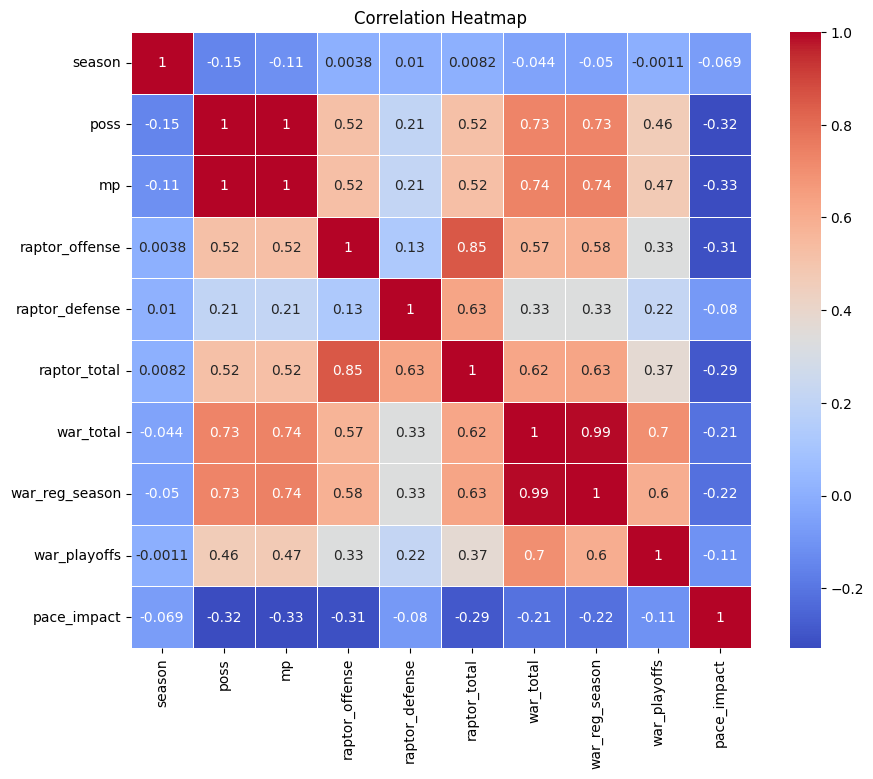

In [45]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# scatter matrix if needed
# scatter_matrix(df, alpha=0.2, figsize=(10, 8), diagonal='hist')
# plt.show()

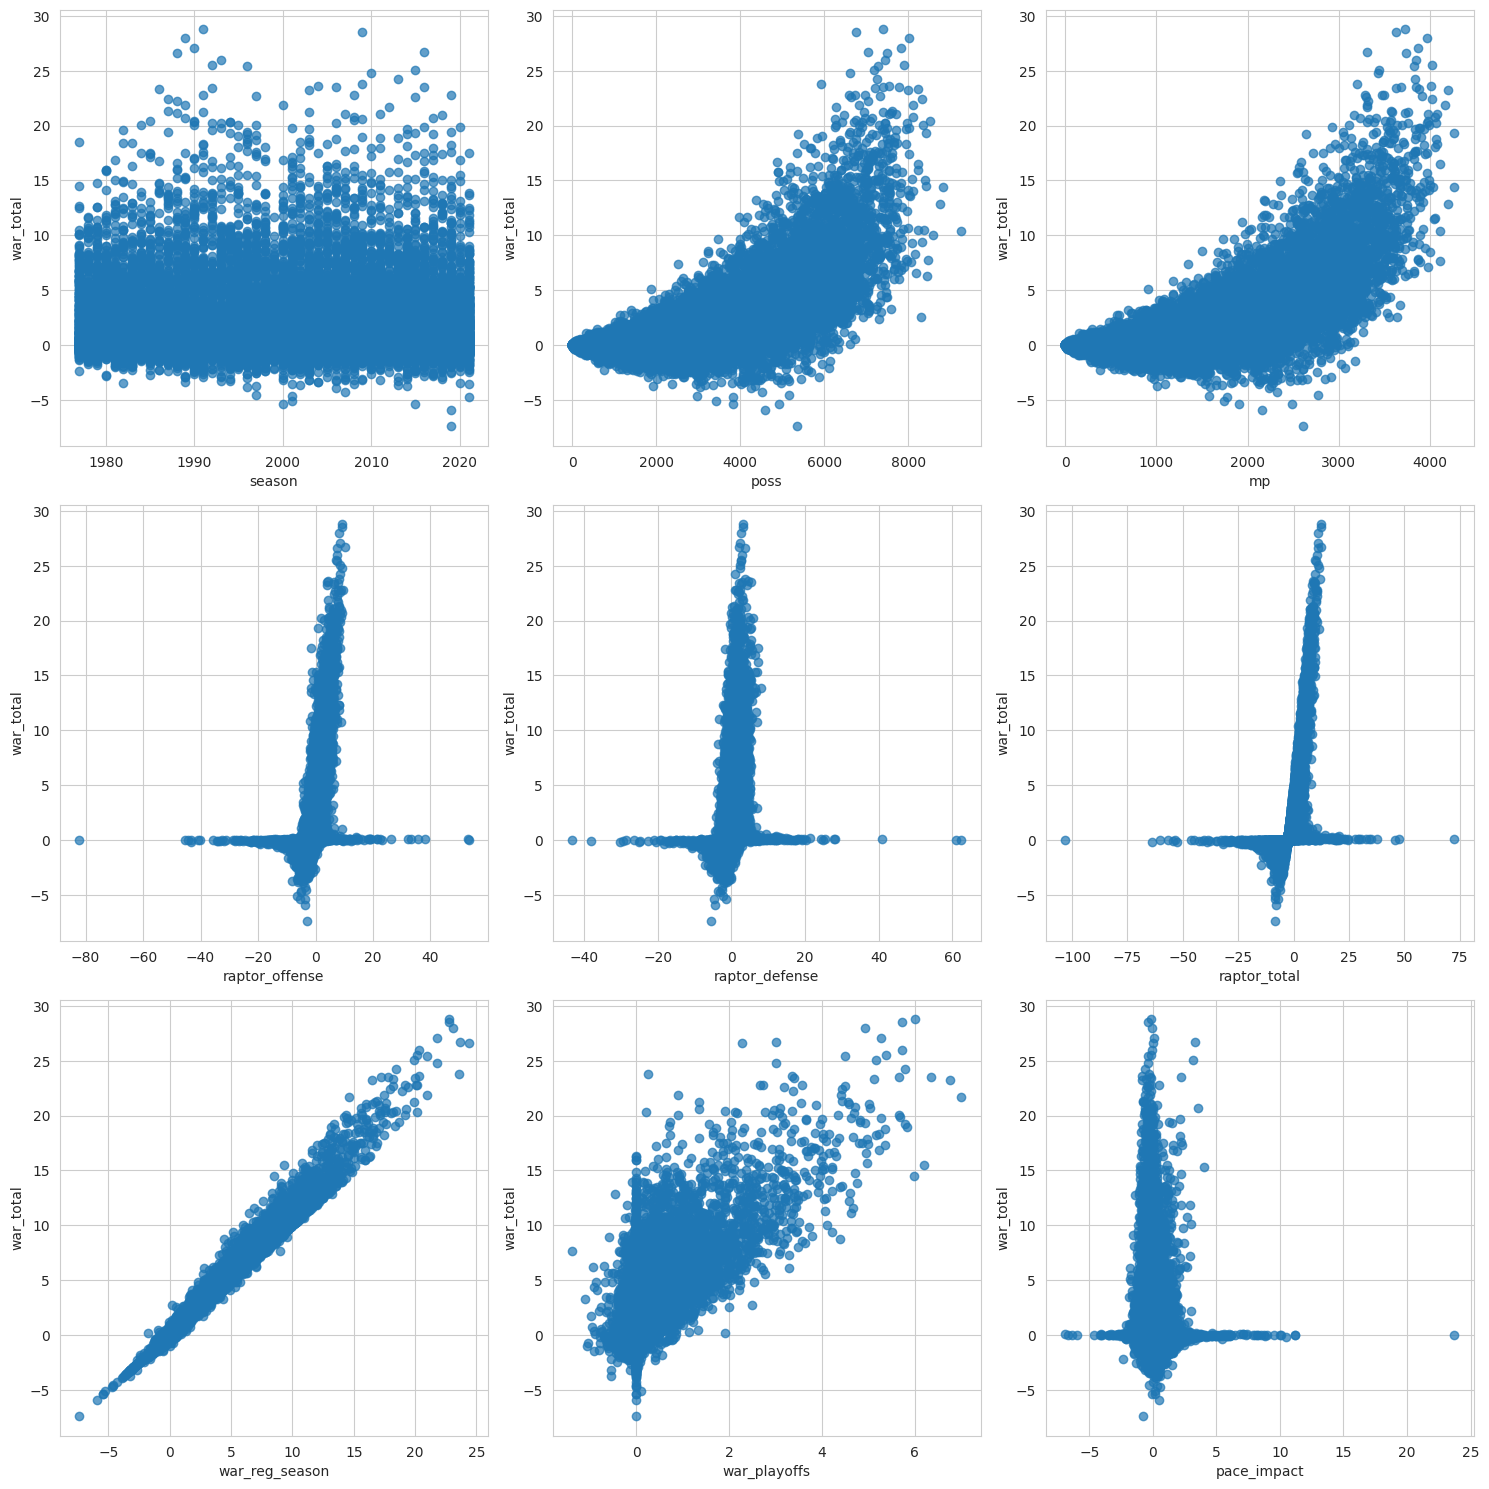

In [65]:
# I am going to target war_total
# scatter war_total against all other features

# Filter only numeric features to avoid errors
# Filter numeric columns and exclude 'war_total'
numeric_features = df.select_dtypes(include='number').drop(columns=['war_total']).columns

# Set up the subplots
n_features = len(numeric_features)  # Exclude 'war_total'
n_cols = 3
n_rows = 3

f, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 15))
axs = axs.flatten()  # Flatten the 2D array of axes

# Plot 'war_total' against other numeric features
for feature, ax in zip(numeric_features, axs):
    if feature != 'war_total':
        ax.scatter(df[feature], df['war_total'], alpha=0.7)
        ax.set_xlabel(feature)
        ax.set_ylabel('war_total')



plt.tight_layout()
plt.show()


In [57]:
df

,player_name,player_id,season,poss,mp,raptor_offense,raptor_defense,raptor_total,war_total,war_reg_season,war_playoffs,pace_impact
0,Alaa Abdelnaby,abdelal01,1991,640,303,-3.938450,-0.510076,-4.448526,-0.265191,-0.226163,-0.039028,0.199241
1,Alaa Abdelnaby,abdelal01,1992,1998,959,-2.553849,-0.197943,-2.751792,-0.006893,0.070322,-0.077215,0.485436
2,Alaa Abdelnaby,abdelal01,1993,2754,1379,-2.373736,-2.069808,-4.443544,-1.227189,-0.845272,-0.381918,0.488266
3,Alaa Abdelnaby,abdelal01,1994,320,159,-6.140056,-2.748312,-8.888368,-0.500600,-0.500600,0.000000,0.511152
4,Alaa Abdelnaby,abdelal01,1995,984,506,-3.846543,-1.268012,-5.114556,-0.615802,-0.615802,0.000000,1.545922
...,...,...,...,...,...,...,...,...,...,...,...,...
18548,Ivica Zubac,zubaciv01,2017,1305,609,-3.358178,-3.040589,-6.398767,-1.141160,-1.141160,0.000000,0.644128
18549,Ivica Zubac,zubaciv01,2018,871,410,-2.903709,2.688832,-0.214877,0.531968,0.531968,0.000000,0.311576
18550,Ivica Zubac,zubaciv01,2019,2345,1079,-2.362444,1.813768,-0.548676,1.217134,1.114995,0.102138,0.077074
18551,Ivica Zubac,zubaciv01,2020,3447,1646,1.099849,3.549458,4.649308,6.224207,5.020903,1.203304,-0.410164
